<a href="https://colab.research.google.com/github/AlvinaAnoop/Firstrepo/blob/main/mini_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Smart Retail Analytics Dataset.csv'
df = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
print(df.head())

# Check the data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit  
0   11/8/2017  North   1254      0.12  401.28  
1   11/8/2017  South    749      0.18  149.80  
2   6/12/2017   West   2360      0.21  165.20  
3  10/11/2016  South    896      0.25   89.60  
4  10/11/2016  South   2355      0.26  918.45  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Custo

In [5]:
# Define 10 major KPIs
KPIs = ['Total Sales', 'Average Sales per Transaction', 'Customer Count', 'Top Selling Products', 'Profit Margin', 'Customer Retention Rate', 'Inventory Turnover Rate', 'Average Basket Size', 'Market Basket Analysis', 'Customer Segmentation']


In [6]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# For example, replace missing values in numerical columns with the mean
df.fillna(df.mean(), inplace=True)


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
dtype: int64


<ipython-input-6-07fe8448cd67>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [8]:
# Define numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

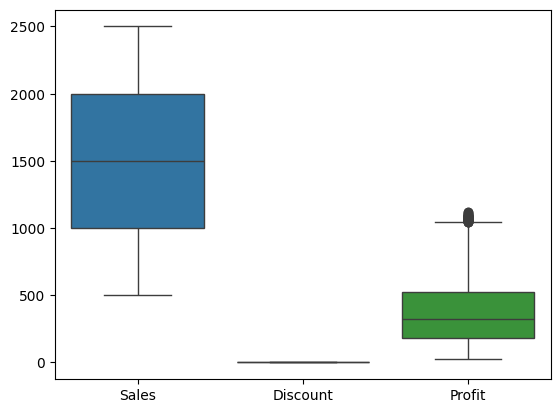

In [9]:
# Outlier detection using boxplots or statistical methods
sns.boxplot(data=df[numerical_cols])
plt.show()

# Handle outliers using IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
# Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

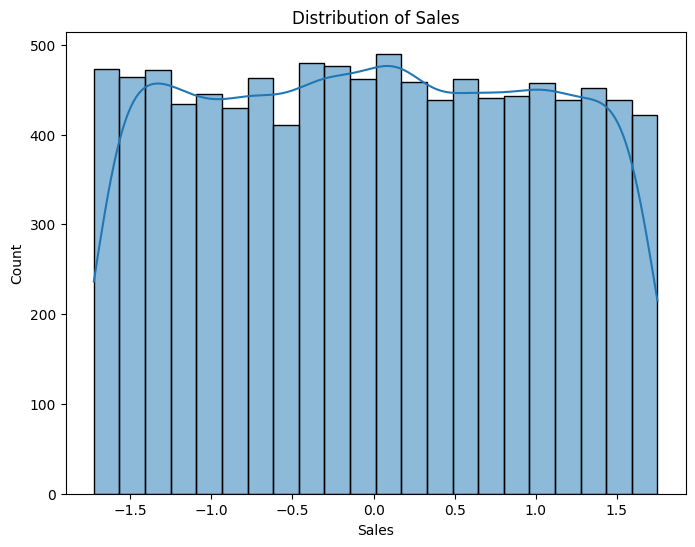

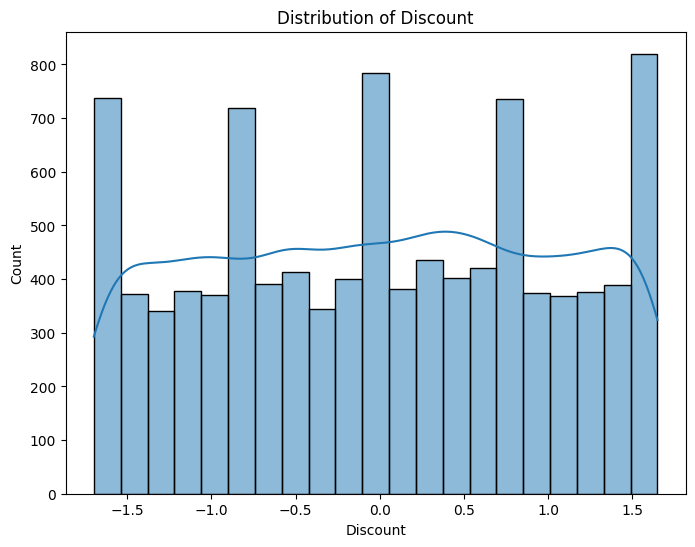

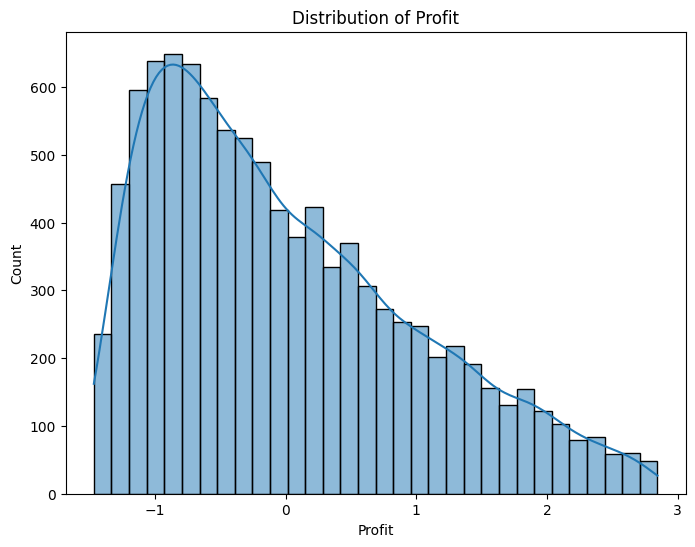

In [11]:
# Univariate analysis
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

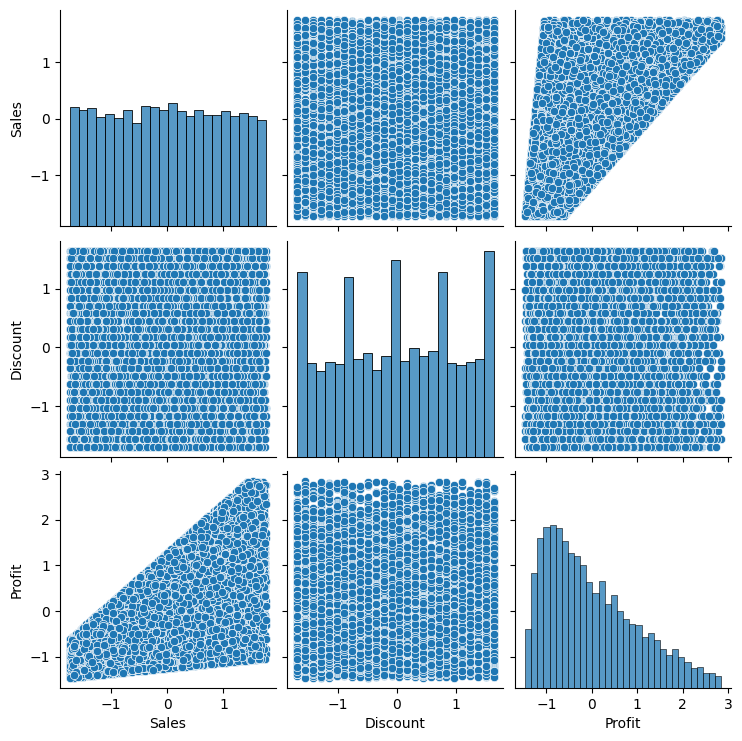

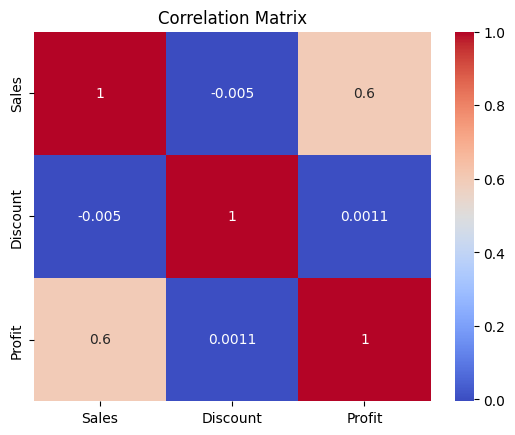

In [12]:
# Bivariate analysis
sns.pairplot(df[numerical_cols])
plt.show()

# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Define categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

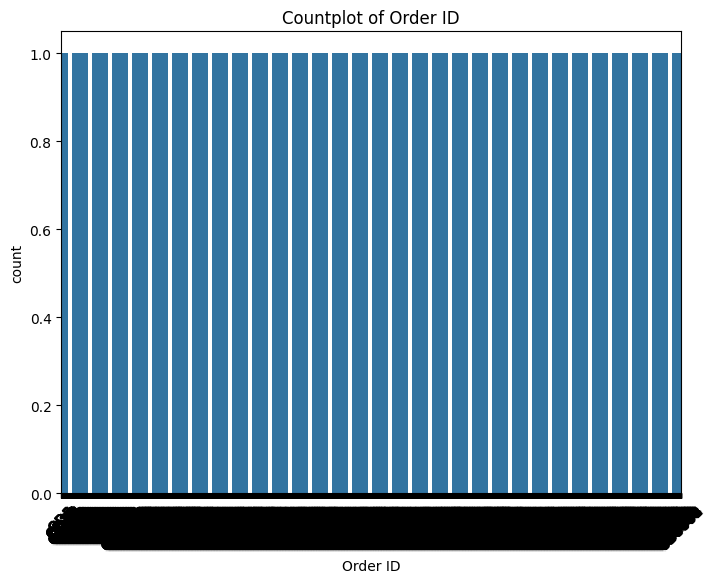

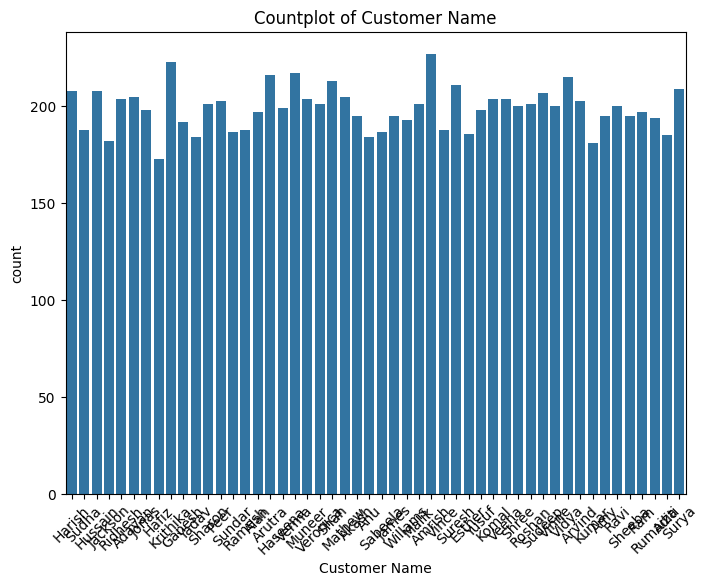

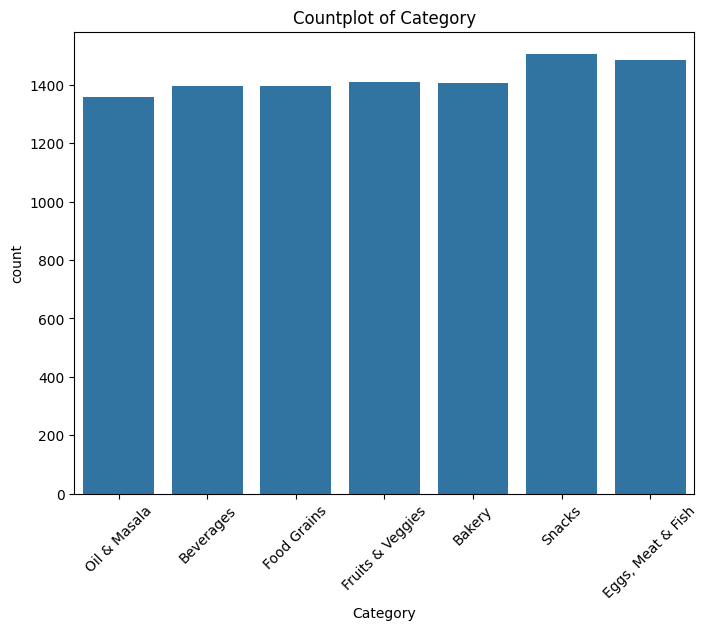

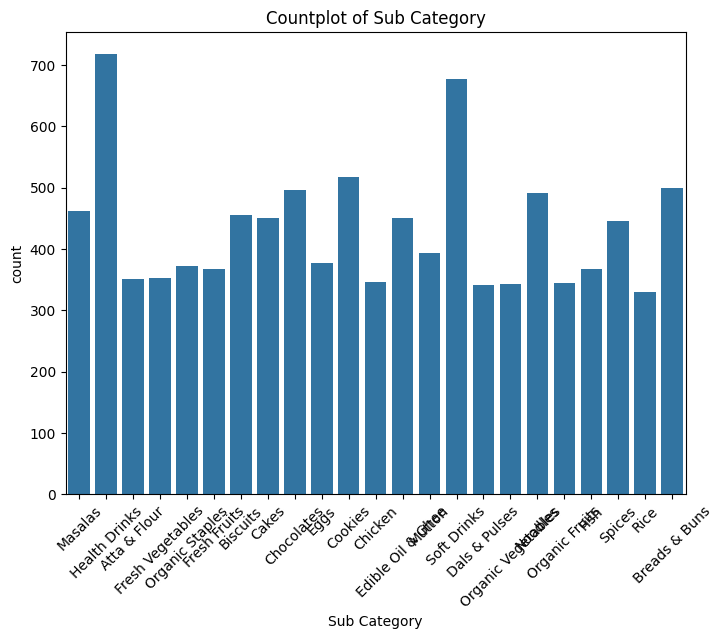

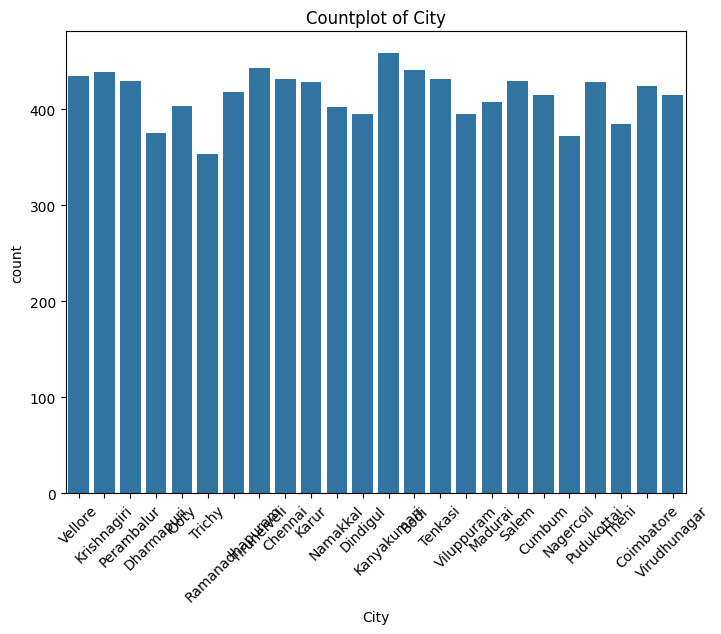

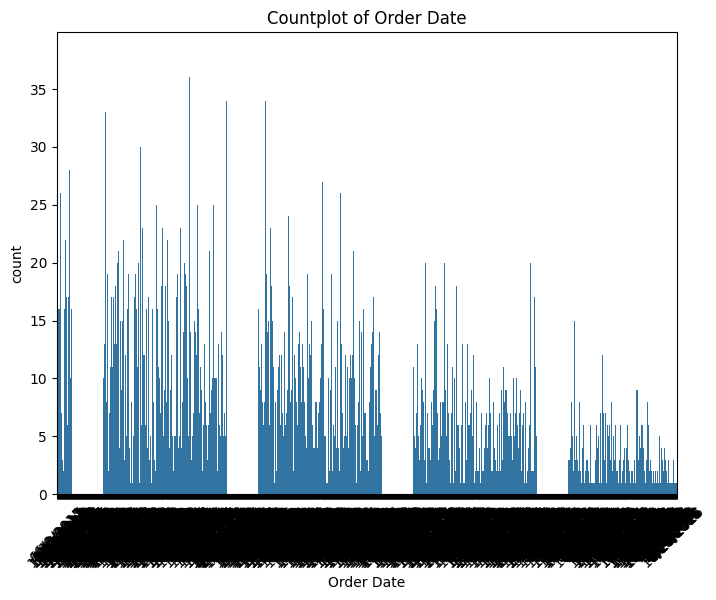

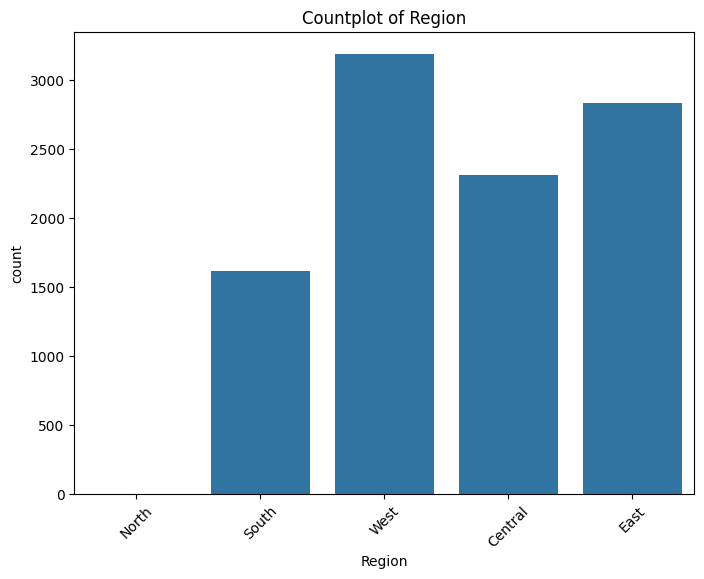

In [15]:
# Categorical variable analysis
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [17]:
# Feature engineering
# extract year and month from a date column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month'] = pd.to_datetime(df['Order Date']).dt.month

In [18]:
print(df.columns)

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'Year', 'Month'],
      dtype='object')


In [20]:
print(frequent_itemsets)


Empty DataFrame
Columns: [support, itemsets]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Adjust minimum support threshold and minimum confidence threshold
# Lowering the thresholds may capture more frequent itemsets and generate more association rules
frequent_itemsets = apriori(oht, min_support=0.001, use_colnames=True)
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Display the association rules
print(association_rules_df)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
# Convert transaction data into a suitable format
transactions = df.groupby('Order ID')['Sub Category'].apply(list).tolist()

# Check if there are transactions available
if transactions:
    # Convert transactions to a one-hot encoded DataFrame
    oht = pd.DataFrame(columns=np.unique(np.concatenate(transactions)), data=np.zeros((len(transactions), len(np.unique(np.concatenate(transactions))))))

    for i, transaction in enumerate(transactions):
        for item in transaction:
            oht.at[i, item] = 1
else:
    print("No transactions available.")


No transactions available.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-73127e01278a>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  transactions = df.groupby('Order ID')['Sub Category'].apply(list).tolist()


In [29]:
# Assuming you have successfully created the one-hot encoded DataFrame 'oht'

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(oht, min_support=0.001, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Display the association rules
print(association_rules_df)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [34]:
# Apply Apriori algorithm to find frequent itemsets with a lower minimum support threshold
frequent_itemsets = apriori(oht, min_support=0.001, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
df1 = pd.read_csv('/content/Smart Retail Analytics Dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
print(df.shape)

(9994, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
print(df1.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit  
0   11/8/2017  North   1254      0.12  401.28  
1   11/8/2017  South    749      0.18  149.80  
2   6/12/2017   West   2360      0.21  165.20  
3  10/11/2016  South    896      0.25   89.60  
4  10/11/2016  South   2355      0.26  918.45  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Assuming your DataFrame is named 'df'
# Group items by Order ID and aggregate them into lists
transactions = df1.groupby('Order ID')['Sub Category'].apply(list)

# Convert the transactions into a one-hot encoded DataFrame
oht = transactions.str.join('|').str.get_dummies()

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(oht, min_support=0.01, use_colnames=True)
# Display the frequent itemsets
print(frequent_itemsets)

# Apply Apriori algorithm with lower minimum support threshold
frequent_itemsets = apriori(oht, min_support=0.001, use_colnames=True)

# Generate association rules with lower minimum confidence threshold
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Display the association rules
print(association_rules_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support              itemsets
0   0.035321        (Atta & Flour)
1   0.045928            (Biscuits)
2   0.050230       (Breads & Buns)
3   0.045227               (Cakes)
4   0.034821             (Chicken)
5   0.049930          (Chocolates)
6   0.052031             (Cookies)
7   0.034321       (Dals & Pulses)
8   0.045127   (Edible Oil & Ghee)
9   0.037923                (Eggs)
10  0.036922                (Fish)
11  0.036922        (Fresh Fruits)
12  0.035421    (Fresh Vegetables)
13  0.071943       (Health Drinks)
14  0.046328             (Masalas)
15  0.039424              (Mutton)
16  0.049530             (Noodles)
17  0.034821      (Organic Fruits)
18  0.037222     (Organic Staples)
19  0.034721  (Organic Vegetables)
20  0.033020                (Rice)
21  0.068141         (Soft Drinks)
22  0.044727              (Spices)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Inde

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Blue'],
        'Size': ['Small', 'Large', 'Medium', 'Small', 'Large']}

df = pd.DataFrame(data)

# Label Encoding
label_encoder = LabelEncoder()
df['Color_LabelEncoded'] = label_encoder.fit_transform(df['Color'])

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(df['Size'], prefix='Size')
df = pd.concat([df, one_hot_encoded], axis=1)

print(df)


   Color    Size  Color_LabelEncoded  Size_Large  Size_Medium  Size_Small
0    Red   Small                   2           0            0           1
1  Green   Large                   1           1            0           0
2   Blue  Medium                   0           0            1           0
3    Red   Small                   2           0            0           1
4   Blue   Large                   0           1            0           0


In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Smart Retail Analytics Dataset.csv'
df = pd.read_csv(file_path)

# Display the columns to identify categorical variables
print(df.columns)

# Perform Label Encoding for categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Category', 'Sub Category', 'City', 'Region']
for col in categorical_cols:
    df[col + '_LabelEncoded'] = label_encoder.fit_transform(df[col])

# Perform One-Hot Encoding for categorical variables
one_hot_encoded = pd.get_dummies(df[['Category', 'Sub Category', 'City', 'Region']])
df = pd.concat([df, one_hot_encoded], axis=1)

# Display the modified DataFrame
print(df.head())


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit'],
      dtype='object')
  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit  ...  City_Tirunelveli  \
0   11/8/2017  North   1254      0.12  401.28  ...                 0   
1   11/8/2017  South    749      0.18  149.80  ...                 0   
2   6/12/2017   West   2360      0.21  165.20  ...                 0   
3  10/11/2016  South    896      0.25   89.60  ...                 0   
4  10/11/2016  South

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Smart Retail Analytics Dataset.csv'
df = pd.read_csv(file_path)

# Define numerical columns for PCA
numerical_cols = ['Sales', 'Discount', 'Profit']  # Update with your actual numerical columns

# Standardize numerical features before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame to store PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Concatenate PCA results with the original DataFrame
df_with_pca = pd.concat([df, pca_df], axis=1)

# Display the DataFrame with PCA results
print(df_with_pca.head())


  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit      PCA1      PCA2  
0   11/8/2017  North   1254      0.12  401.28 -0.210204  1.430175  
1   11/8/2017  South    749      0.18  149.80 -1.574811  0.635786  
2   6/12/2017   West   2360      0.21  165.20  0.440444  0.233327  
3  10/11/2016  South    896      0.25   89.60 -1.578267 -0.299816  
4  10/11/2016  South   2355      0.26  918.45  2.649947 -0.465186  


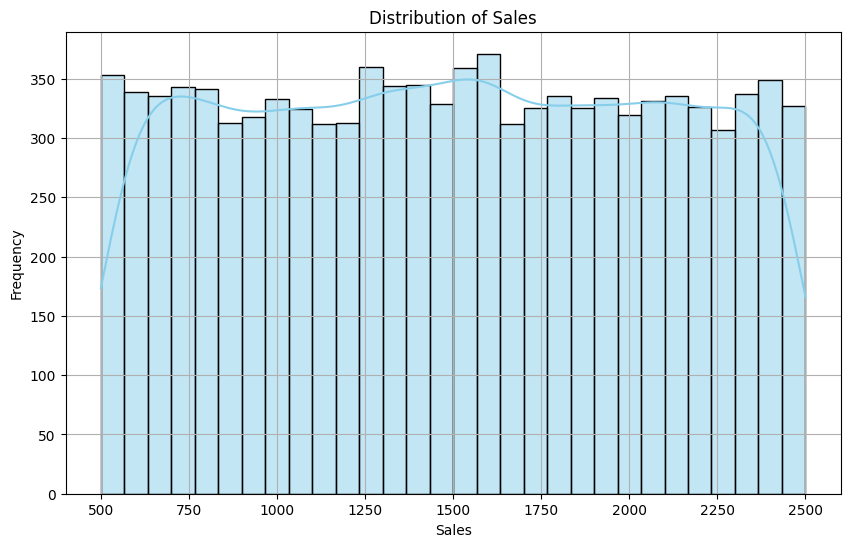

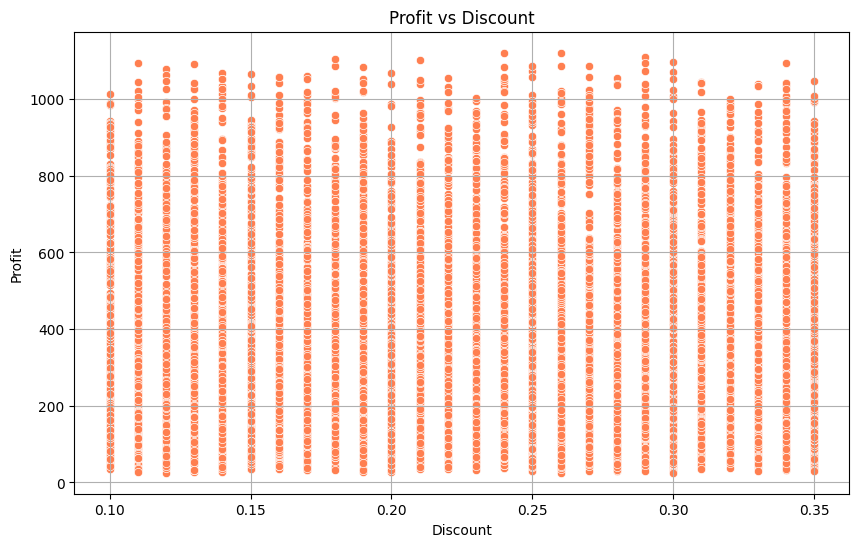

<ipython-input-66-208cb62d2950>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Sales', palette='Set3')


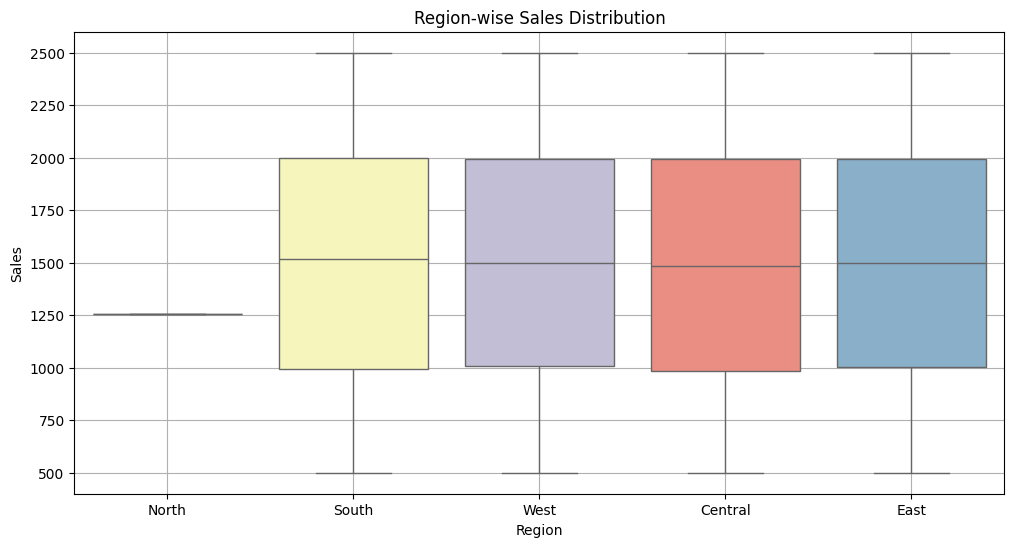

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Smart Retail Analytics Dataset.csv'
df = pd.read_csv(file_path)

# Data Visualization
# Example 1: Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sales', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Example 2: Profit vs Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', color='coral')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Example 3: Region-wise Sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Sales', palette='Set3')
plt.title('Region-wise Sales Distribution')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [67]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Smart Retail Analytics Dataset.csv'
df = pd.read_csv(file_path)

# Analyze Sales and Profit Region-wise
region_sales_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Display the results
print(region_sales_profit)


    Region    Sales      Profit
0  Central  3468156   856806.84
1     East  4248368  1074345.58
2    North     1254      401.28
3    South  2440461   623562.89
4     West  4798743  1192004.61


<ipython-input-68-9978cceb27bf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales', palette='Blues')


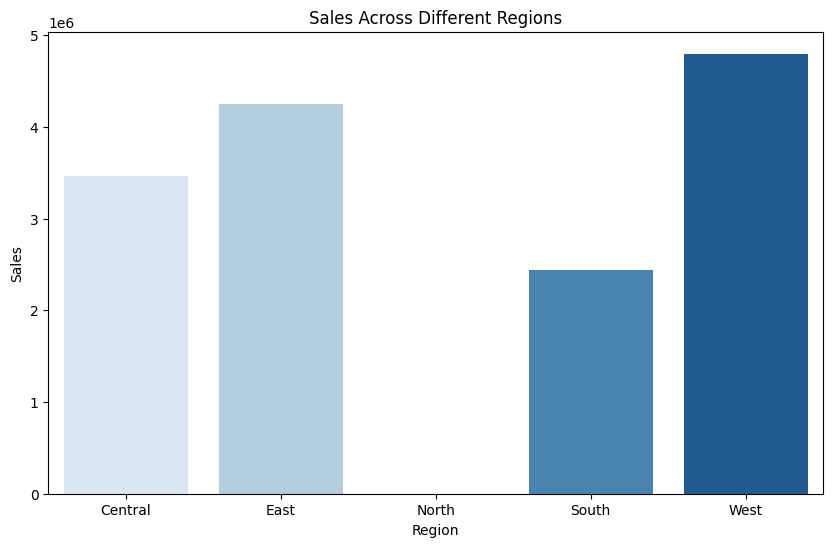

<ipython-input-68-9978cceb27bf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Profit', palette='Greens')


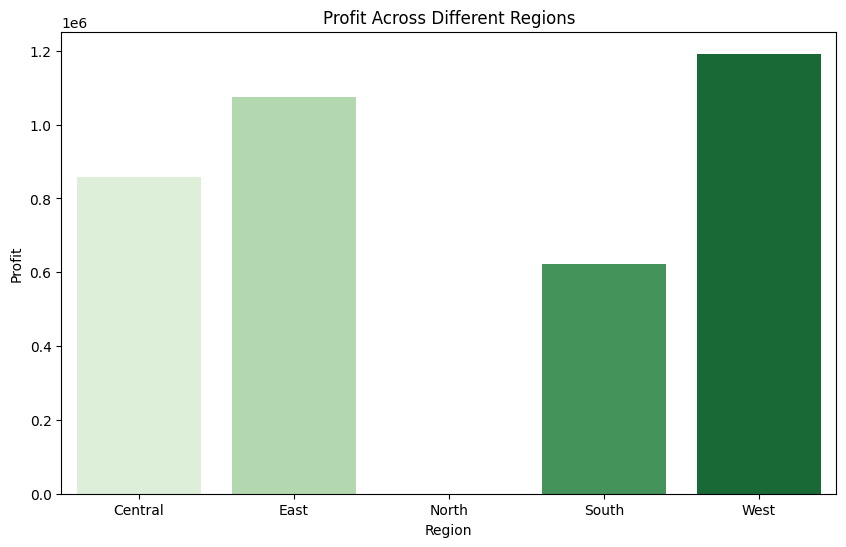

<ipython-input-68-9978cceb27bf>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Profit_Margin', palette='Oranges')


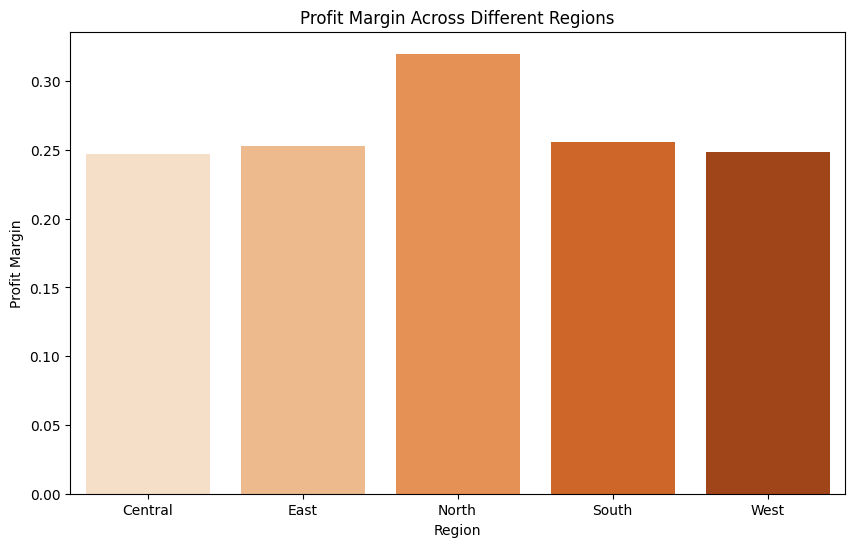

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame named df
data = {
    'Region': ['Central', 'East', 'North', 'South', 'West'],
    'Sales': [3468156, 4248368, 1254, 2440461, 4798743],
    'Profit': [856806.84, 1074345.58, 401.28, 623562.89, 1192004.61]
}

df = pd.DataFrame(data)

# Visualize Sales and Profit region-wise
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Sales', palette='Blues')
plt.title('Sales Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Profit', palette='Greens')
plt.title('Profit Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

# Calculate profit margin (Profit / Sales) for each region
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Visualize Profit Margin across different regions
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Profit_Margin', palette='Oranges')
plt.title('Profit Margin Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Profit Margin')
plt.show()



        Sales                                                             \
        count       mean std        min        25%        50%        75%   
Region                                                                     
Central   1.0  3468156.0 NaN  3468156.0  3468156.0  3468156.0  3468156.0   
East      1.0  4248368.0 NaN  4248368.0  4248368.0  4248368.0  4248368.0   
North     1.0     1254.0 NaN     1254.0     1254.0     1254.0     1254.0   
South     1.0  2440461.0 NaN  2440461.0  2440461.0  2440461.0  2440461.0   
West      1.0  4798743.0 NaN  4798743.0  4798743.0  4798743.0  4798743.0   

                   Profit                                                      \
               max  count        mean std         min         25%         50%   
Region                                                                          
Central  3468156.0    1.0   856806.84 NaN   856806.84   856806.84   856806.84   
East     4248368.0    1.0  1074345.58 NaN  1074345.58  1074345.58  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


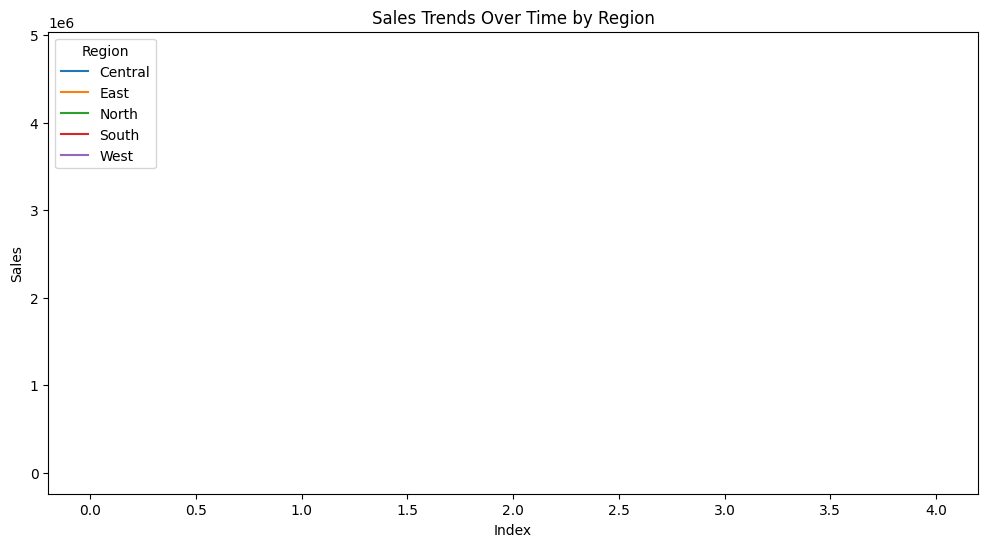

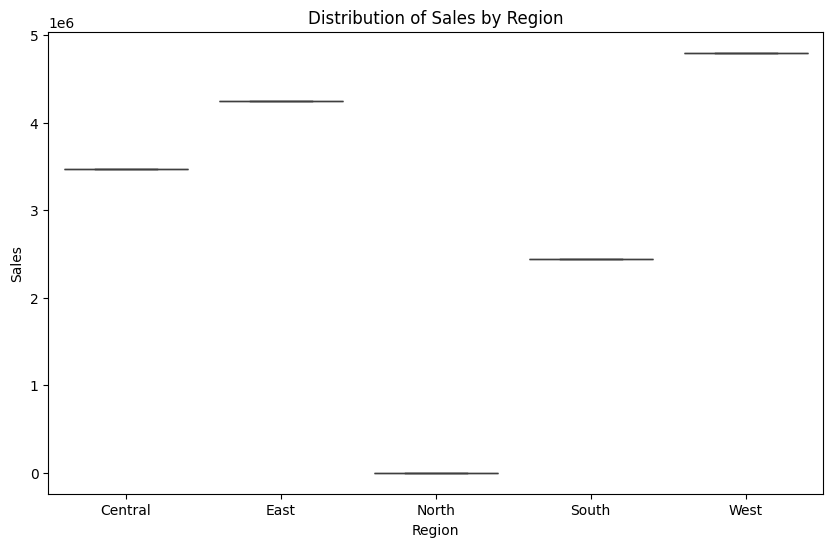

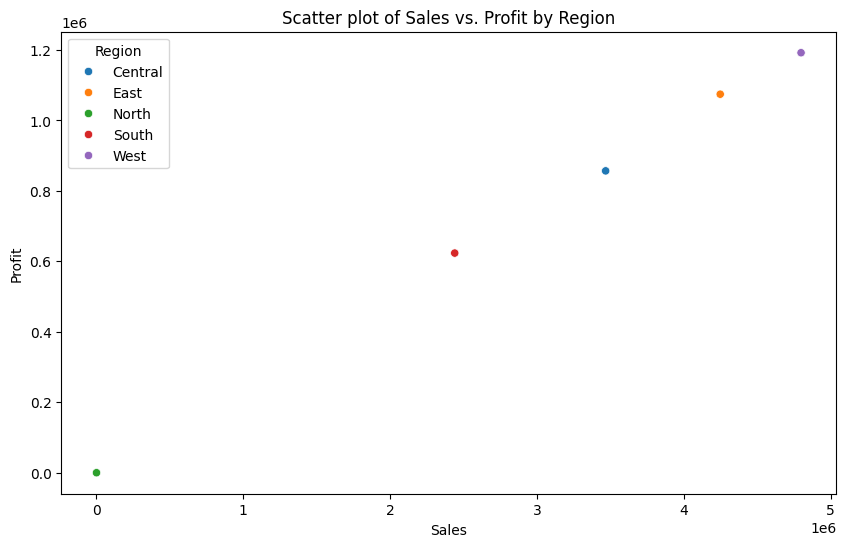

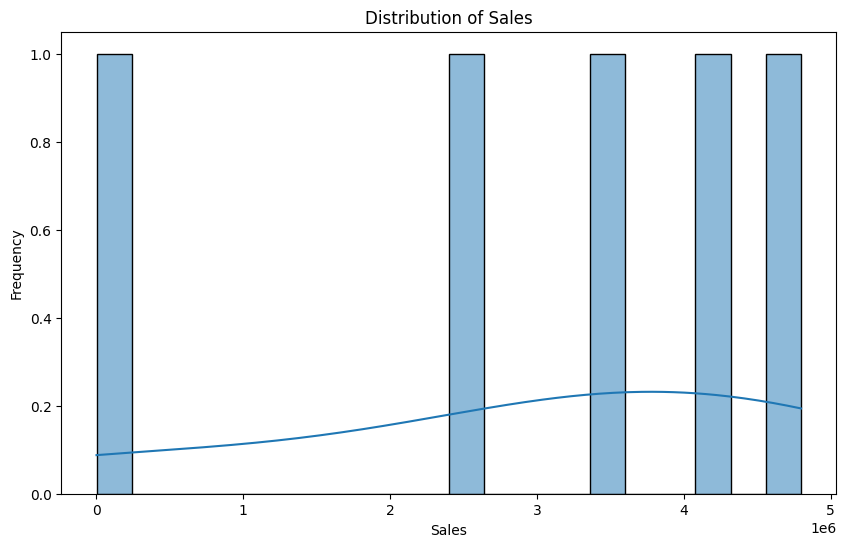

In [74]:
# Calculate summary statistics
summary_stats = df.groupby('Region')[['Sales', 'Profit']].describe()
print(summary_stats)

# Conduct hypothesis testing (e.g., t-tests)
from scipy.stats import ttest_ind

central_sales = df[df['Region'] == 'Central']['Sales']
east_sales = df[df['Region'] == 'East']['Sales']

t_stat, p_value = ttest_ind(central_sales, east_sales)
print(f"T-test results - Sales between Central and East regions: t_stat={t_stat}, p_value={p_value}")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Sales', hue='Region')
plt.title('Sales Trends Over Time by Region')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()



# Geographic visualization (assuming you have geographical data)
# You can use libraries like GeoPandas or Plotly to create choropleth maps.

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Sales')
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Region')
plt.title('Scatter plot of Sales vs. Profit by Region')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sales', bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [73]:
df.head()

,Region,Sales,Profit,Profit_Margin
0,Central,3468156,856806.84,0.247050
1,East,4248368,1074345.58,0.252884
2,North,1254,401.28,0.320000
3,South,2440461,623562.89,0.255510
4,West,4798743,1192004.61,0.248399


In [76]:
import pandas as pd

# Group by Region and calculate total sales and profit
region_sales_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'})

# Display the aggregated results
print("Sales and Profit Region-wise:")
print(region_sales_profit)


Sales and Profit Region-wise:
           Sales      Profit
Region                      
Central  3468156   856806.84
East     4248368  1074345.58
North       1254      401.28
South    2440461   623562.89
West     4798743  1192004.61


Sample data from the dataset:
    Region    Sales      Profit  Profit_Margin
0  Central  3468156   856806.84       0.247050
1     East  4248368  1074345.58       0.252884
2    North     1254      401.28       0.320000
3    South  2440461   623562.89       0.255510
4     West  4798743  1192004.61       0.248399

Sales and Profit Region-wise:
    Region    Sales      Profit
0  Central  3468156   856806.84
1     East  4248368  1074345.58
2    North     1254      401.28
3    South  2440461   623562.89
4     West  4798743  1192004.61


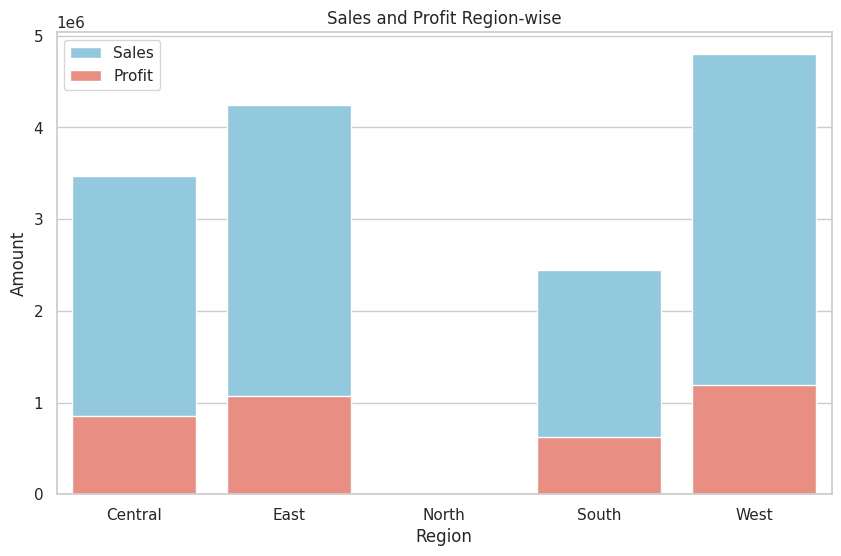

In [78]:
import pandas as pd

# Display the first few rows of the DataFrame to understand its structure
print("Sample data from the dataset:")
print(df.head())

# Group by Region and calculate total sales and profit
region_sales_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Display the aggregated results
print("\nSales and Profit Region-wise:")
print(region_sales_profit)

# Visualize the data using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for sales and profit region-wise
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales_profit, color='skyblue', label='Sales')
sns.barplot(x='Region', y='Profit', data=region_sales_profit, color='salmon', label='Profit')
plt.title('Sales and Profit Region-wise')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()
plt.show()


Sample data from the dataset:
    Region    Sales      Profit  Profit_Margin
0  Central  3468156   856806.84       0.247050
1     East  4248368  1074345.58       0.252884
2    North     1254      401.28       0.320000
3    South  2440461   623562.89       0.255510
4     West  4798743  1192004.61       0.248399

Summary statistics of numerical columns:
              Sales        Profit  Profit_Margin
count  5.000000e+00  5.000000e+00       5.000000
mean   2.991396e+06  7.494242e+05       0.264769
std    1.891974e+06  4.716616e+05       0.031062
min    1.254000e+03  4.012800e+02       0.247050
25%    2.440461e+06  6.235629e+05       0.248399
50%    3.468156e+06  8.568068e+05       0.252884
75%    4.248368e+06  1.074346e+06       0.255510
max    4.798743e+06  1.192005e+06       0.320000


<ipython-input-79-304b6dd474d8>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


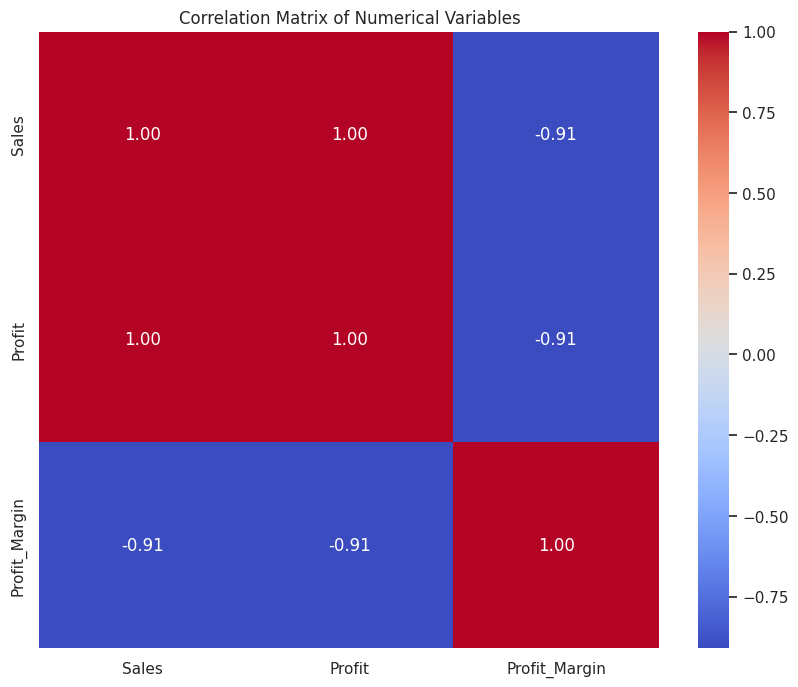


Mean Squared Error (MSE) of the Linear Regression Model: 285197140.14957744


In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows of the DataFrame to understand its structure
print("Sample data from the dataset:")
print(df.head())

# Descriptive Analytics: Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Diagnostic Analytics: Correlation analysis
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Predictive Analytics: Simple Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
X = df[['Sales']]  # Independent variable
y = df['Profit']   # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the profits for the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error (MSE) of the Linear Regression Model:", mse)

# Visualize the predicted profits against the actual profits



Accuracy of the Random Forest classifier: 0.0

Classification Report:
              precision    recall  f1-score   support

        East       0.00      0.00      0.00       1.0
       South       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

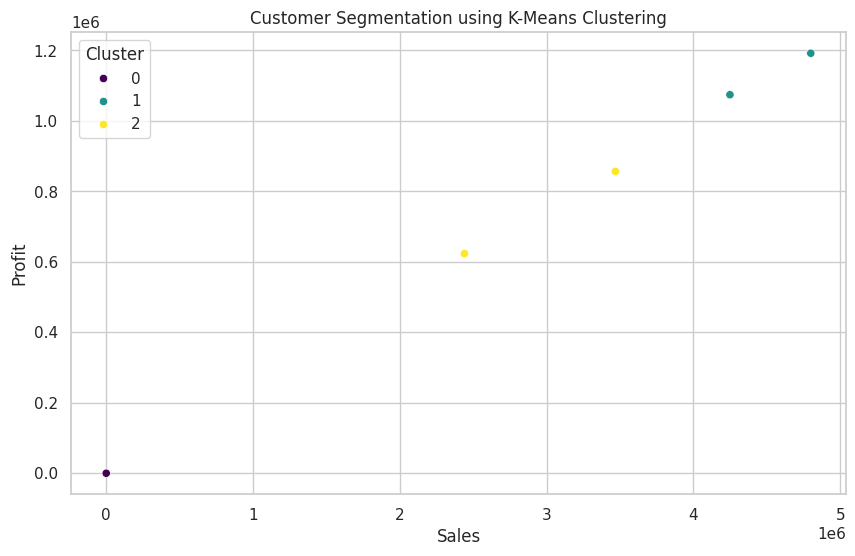

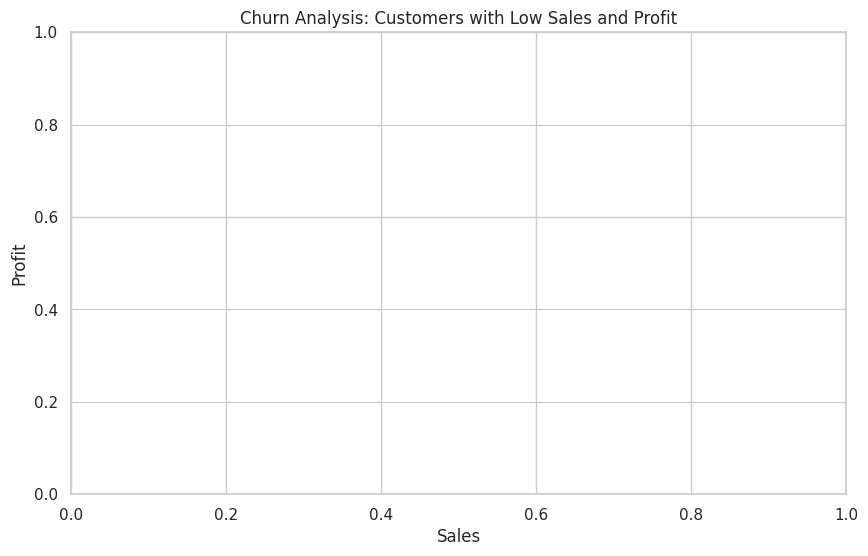

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans


# Perform data preprocessing if necessary

# Integrating Machine Learning Models for Predictive Analytics
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Sales', 'Profit', 'Region'])  # Features
y = df['Region']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Random Forest classifier:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform Customer Segmentation using K-Means Clustering
# Select relevant features for clustering
features_for_clustering = df[['Sales', 'Profit']]

# Initialize and fit K-Means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_for_clustering)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='viridis', legend='full')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Perform Churn Analysis (Example: analyzing churn based on Sales and Profit)
# You can define your churn criteria based on your business context

# Example: Identify customers with low sales and profit
low_sales_profit_customers = df[(df['Sales'] < 1000) & (df['Profit'] < 100)]

# Visualize churned customers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_sales_profit_customers, x='Sales', y='Profit', color='red')
plt.title('Churn Analysis: Customers with Low Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


Welcome to Smart Retail Analytics System
1. Analyze Sales and Profit Region-wise
2. Perform Customer Segmentation
3. Perform Churn Analysis
4. Exit
Enter your choice (1-4): 1

Region-wise Sales and Profit:
           Sales      Profit
Region                      
Central  3468156   856806.84
East     4248368  1074345.58
North       1254      401.28
South    2440461   623562.89
West     4798743  1192004.61
Welcome to Smart Retail Analytics System
1. Analyze Sales and Profit Region-wise
2. Perform Customer Segmentation
3. Perform Churn Analysis
4. Exit
Enter your choice (1-4): 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


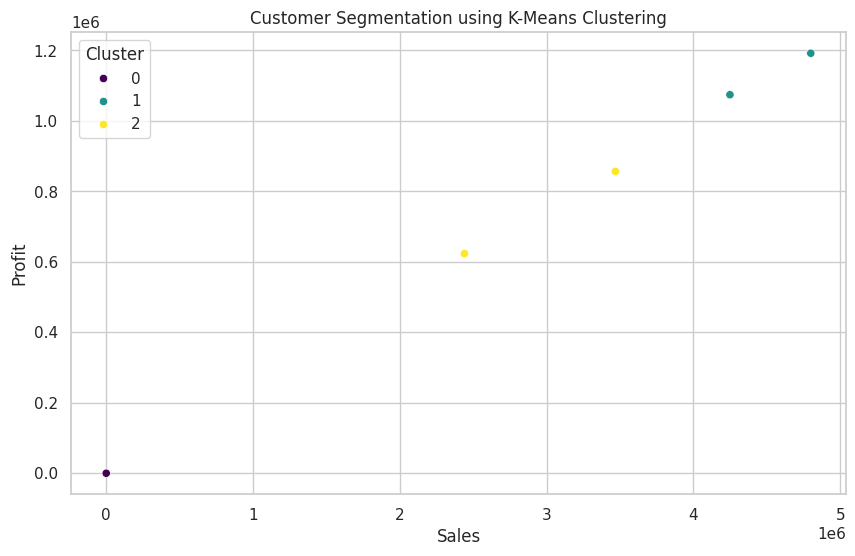

Welcome to Smart Retail Analytics System
1. Analyze Sales and Profit Region-wise
2. Perform Customer Segmentation
3. Perform Churn Analysis
4. Exit
Enter your choice (1-4): 1

Region-wise Sales and Profit:
           Sales      Profit
Region                      
Central  3468156   856806.84
East     4248368  1074345.58
North       1254      401.28
South    2440461   623562.89
West     4798743  1192004.61
Welcome to Smart Retail Analytics System
1. Analyze Sales and Profit Region-wise
2. Perform Customer Segmentation
3. Perform Churn Analysis
4. Exit
Enter your choice (1-4): 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


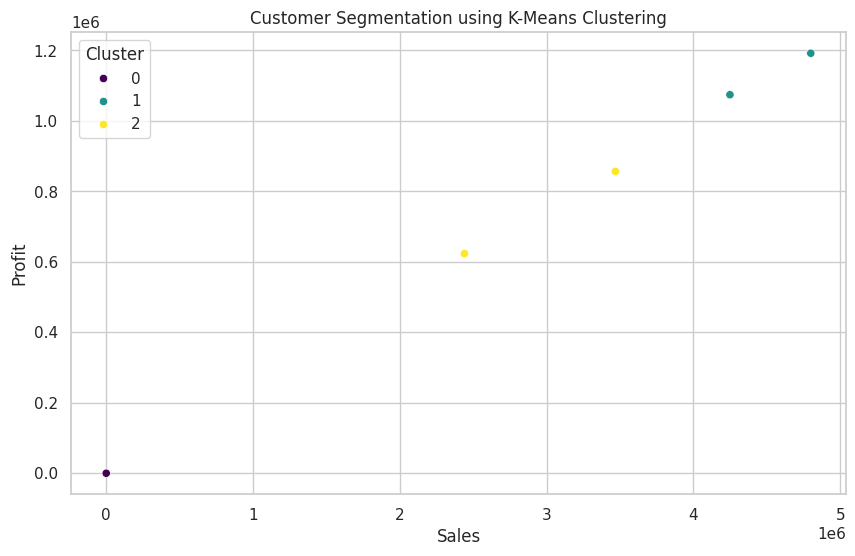

Welcome to Smart Retail Analytics System
1. Analyze Sales and Profit Region-wise
2. Perform Customer Segmentation
3. Perform Churn Analysis
4. Exit
Enter your choice (1-4): 3


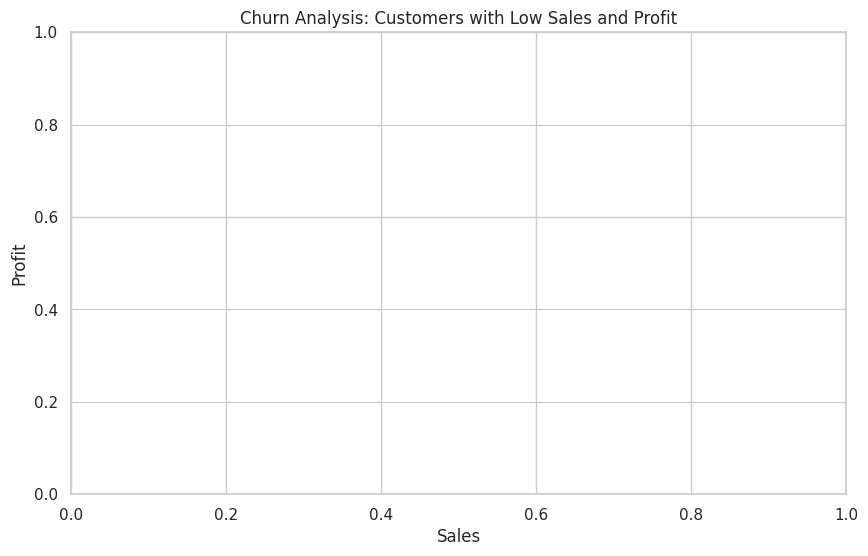

Welcome to Smart Retail Analytics System
1. Analyze Sales and Profit Region-wise
2. Perform Customer Segmentation
3. Perform Churn Analysis
4. Exit
Enter your choice (1-4): 4
Exiting Smart Retail Analytics System. Goodbye!


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans


# Function to display menu options
def display_menu():
    print("Welcome to Smart Retail Analytics System")
    print("1. Analyze Sales and Profit Region-wise")
    print("2. Perform Customer Segmentation")
    print("3. Perform Churn Analysis")
    print("4. Exit")

# Function to analyze sales and profit region-wise
def analyze_sales_profit_region_wise():
    region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum()
    print("\nRegion-wise Sales and Profit:")
    print(region_sales_profit)

# Function to perform customer segmentation using K-Means clustering
def perform_customer_segmentation():
    features_for_clustering = df[['Sales', 'Profit']]
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(features_for_clustering)
    df['Cluster'] = kmeans.labels_

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='viridis', legend='full')
    plt.title('Customer Segmentation using K-Means Clustering')
    plt.xlabel('Sales')
    plt.ylabel('Profit')
    plt.show()

# Function to perform churn analysis
def perform_churn_analysis():
    low_sales_profit_customers = df[(df['Sales'] < 1000) & (df['Profit'] < 100)]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=low_sales_profit_customers, x='Sales', y='Profit', color='red')
    plt.title('Churn Analysis: Customers with Low Sales and Profit')
    plt.xlabel('Sales')
    plt.ylabel('Profit')
    plt.show()

# Main function to run the CLI-based system
def main():
    while True:
        display_menu()
        choice = input("Enter your choice (1-4): ")

        if choice == '1':
            analyze_sales_profit_region_wise()
        elif choice == '2':
            perform_customer_segmentation()
        elif choice == '3':
            perform_churn_analysis()
        elif choice == '4':
            print("Exiting Smart Retail Analytics System. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 4.")

if __name__ == "__main__":
    main()
